In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
train_data = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = train_data.iloc[:,1:2].values

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_training_set = scaler.fit_transform(training_set)

In [0]:
x_train = []
y_train = []
for i in range(60, 1258):
  x_train.append(scaled_training_set[i-60:i, 0])
  y_train.append(scaled_training_set[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [0]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [0]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [8]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))


regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
regressor.add(Dense(1))

In [10]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')

In [11]:
regressor.fit(x_train, y_train, epochs=100, batch_size=32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





1198/1198 [==============================] - 11s 9ms/step - loss: 0.0459
Epoch 2/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0066
Epoch 3/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0054
Epoch 4/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0046
Epoch 5/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0050
Epoch 6/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0044
Epoch 7/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0046
Epoch 8/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0044
Epoch 9/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0043
Epoch 10/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0044
Epoch 11/100
1198/1198 [==============================] 

In [0]:
test_data = pd.read_csv('Google_Stock_Price_Test.csv')
test_set = test_data.iloc[:,1:2].values

In [0]:
dataset_total = pd.concat((train_data['Open'], test_data['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test_data) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)


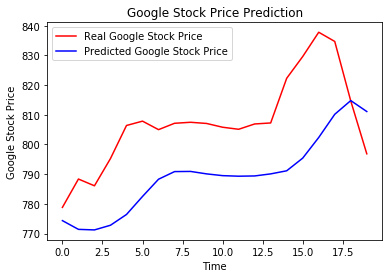

In [17]:
plt.plot(test_set, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
